2024-12-02 02:03:12,828 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-12-02 02:03:12,829 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM escolas")
2024-12-02 02:03:12,829 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-12-02 02:03:12,830 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM escolas")
2024-12-02 02:03:12,830 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-12-02 02:03:12,831 INFO sqlalchemy.engine.Engine SELECT * FROM escolas
2024-12-02 02:03:12,832 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-12-02 02:03:13,410 INFO sqlalchemy.engine.Engine ROLLBACK
2024-12-02 02:03:13,411 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-12-02 02:03:13,412 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT * FROM alunos")
2024-12-02 02:03:13,412 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-12-02 02:03:13,413 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT * FROM alunos")
2024-12-02 02:03:13,414 INFO sqlalchemy.engin

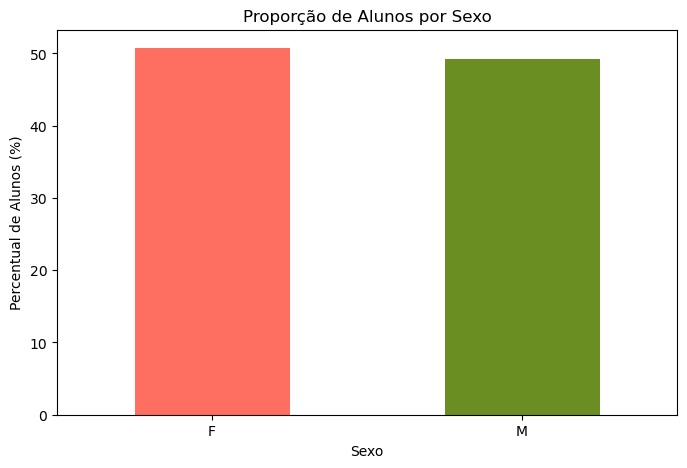

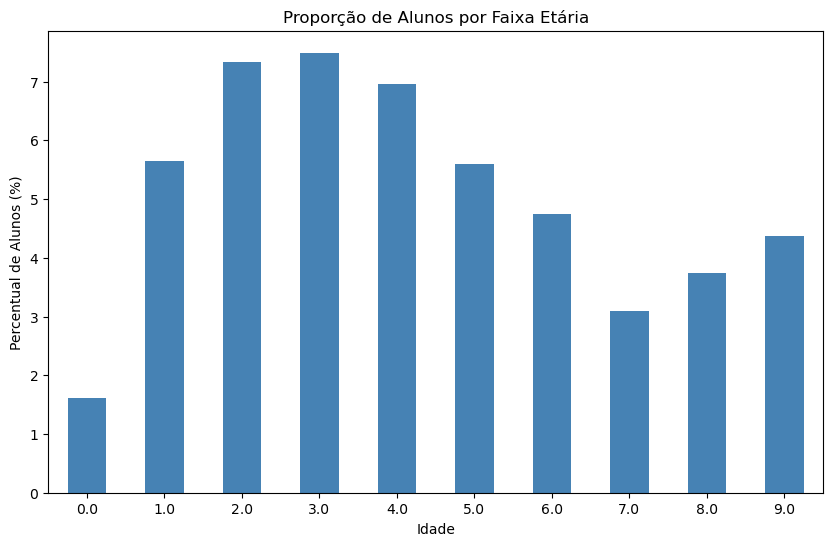

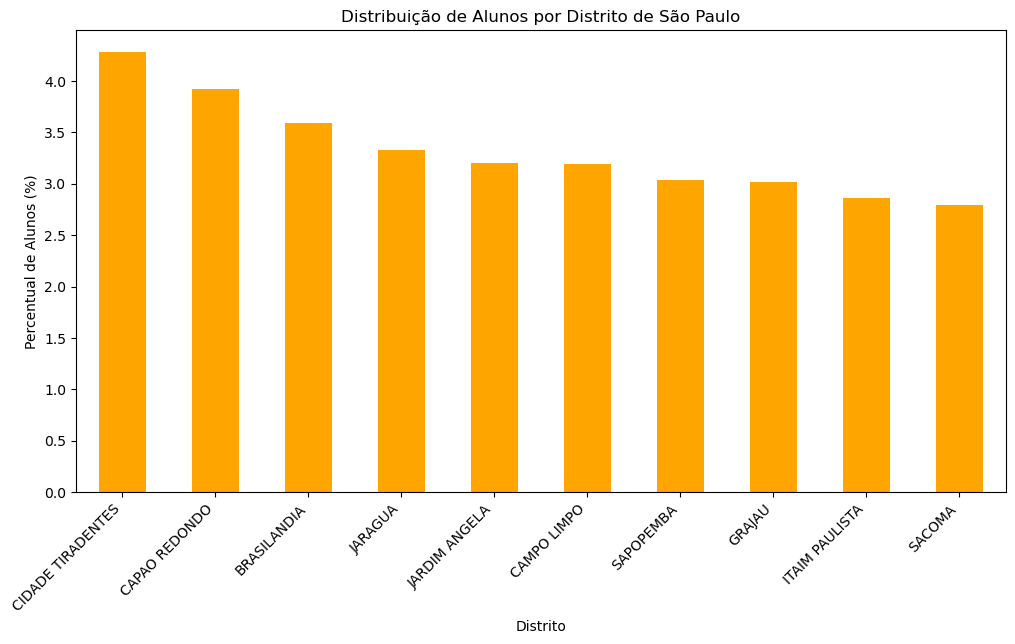

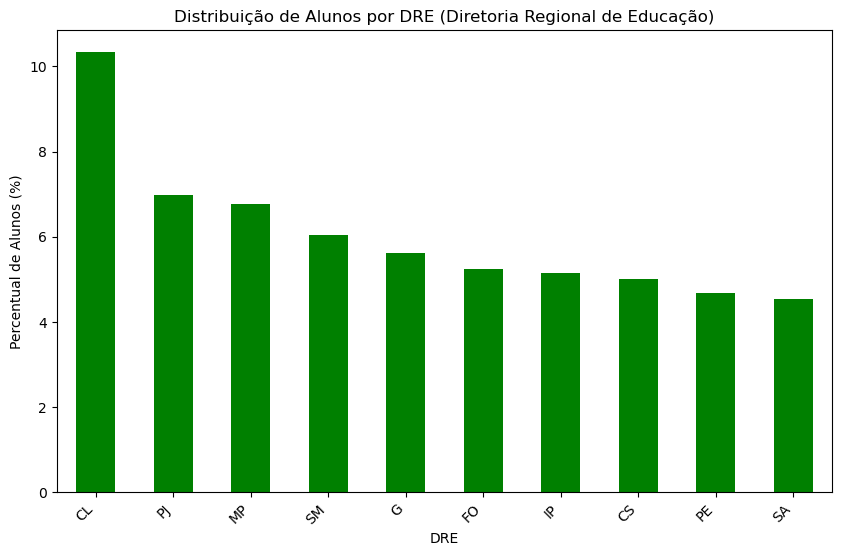

Alunos com Necessidades Educacionais Especiais: 0
Alunos sem Necessidades Educacionais Especiais: 0


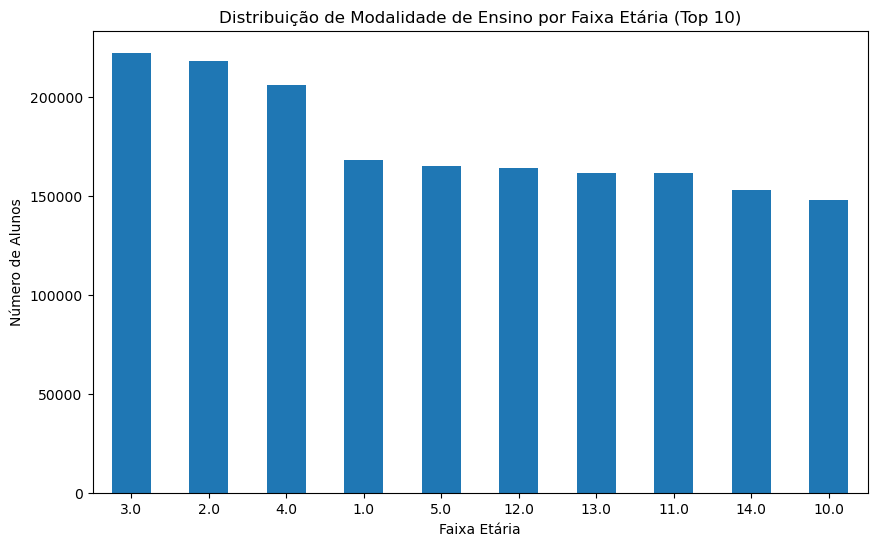

Análise exploratória concluída!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Caminho do banco de dados
db_path = r'C:\Users\jvfal\OneDrive\Área de Trabalho\Teste Analista Jr\data_analytics_jr_test\Questão 1\test_analytics.db'

# Conectar ao banco de dados SQLite
engine = create_engine(f'sqlite:///{db_path}', echo=True)

# Função para carregar os dados das tabelas do banco
def carregar_tabelas(engine):
    escolas_df = pd.read_sql('SELECT * FROM escolas', engine)
    alunos_df = pd.read_sql('SELECT * FROM alunos', engine)
    return escolas_df, alunos_df

# Carregar os dados
escolas_df, alunos_df = carregar_tabelas(engine)

# Função para verificar a qualidade dos dados
def verificar_qualidade_dados(df, nome_tabela):
    # Verifica dados ausentes
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_percentage = (missing_data / len(df)) * 100
    missing_info = pd.DataFrame({'Missing Data': missing_data, 'Percentage': missing_percentage})
    
    # Verifica duplicados
    duplicated_rows = df.duplicated().sum()
    
    print(f"--- Análise de qualidade dos dados para a tabela {nome_tabela} ---")
    print(f"Dados ausentes:\n{missing_info}\n")
    print(f"Duplicados: {duplicated_rows} linhas duplicadas")
    
    return missing_info, duplicated_rows

# Verifica qualidade dos dados das tabelas de escolas e alunos
missing_escolas, duplicated_escolas = verificar_qualidade_dados(escolas_df, 'escolas')
missing_alunos, duplicated_alunos = verificar_qualidade_dados(alunos_df, 'alunos')

# Função para verificar inconsistências na faixa etária e sexo
def verificar_inconsistencias(df):
    # Verifica inconsistências na coluna de faixa etária
    print("Inconsistências na faixa etária de alunos (idade fora do intervalo esperado):")
    print(df[~df['IDADE'].between(3, 18)])

    # Verifica inconsistências no sexo dos alunos (valores inesperados)
    print("Inconsistências no sexo dos alunos:")
    print(df[~df['SEXO'].isin(['M', 'F'])])

# Verifica inconsistências nos dados de alunos
verificar_inconsistencias(alunos_df)

# Análises Exploratórias

sexo_alunos = alunos_df['SEXO'].value_counts(normalize=True).head(10) * 100  # Exibe porcentagens

plt.figure(figsize=(8, 5))
sexo_alunos.plot(kind='bar', color=['#FF6F61', '#6B8E23'])
plt.title('Proporção de Alunos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual de Alunos (%)')
plt.xticks(rotation=0)
plt.show()

faixa_etaria_alunos = alunos_df['IDADE'].value_counts(normalize=True).sort_index().head(10) * 100  # Exibe porcentagens

plt.figure(figsize=(10, 6))
faixa_etaria_alunos.plot(kind='bar', color='steelblue')
plt.title('Proporção de Alunos por Faixa Etária')
plt.xlabel('Idade')
plt.ylabel('Percentual de Alunos (%)')
plt.xticks(rotation=0)
plt.show()

distritos_alunos = alunos_df.groupby('DISTRITO').size() / len(alunos_df) * 100  # Exibe porcentagens

plt.figure(figsize=(12, 6))
distritos_alunos.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Distribuição de Alunos por Distrito de São Paulo')
plt.xlabel('Distrito')
plt.ylabel('Percentual de Alunos (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


# Verificando a distribuição dos alunos por DRE
alunos_por_dre = alunos_df['DRE'].value_counts(normalize=True).head(10) * 100  # Exibe porcentagens

plt.figure(figsize=(10, 6))
alunos_por_dre.plot(kind='bar', color='green')
plt.title('Distribuição de Alunos por DRE (Diretoria Regional de Educação)')
plt.xlabel('DRE')
plt.ylabel('Percentual de Alunos (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


# Verificando a quantidade de alunos com NEE
alunos_com_nee = alunos_df[alunos_df['NEE'] == 'S'].shape[0]
alunos_sem_nee = alunos_df[alunos_df['NEE'] == 'N'].shape[0]

#Relação entre Faixa Etária e Modalidade de Ensino
print(f"Alunos com Necessidades Educacionais Especiais: {alunos_com_nee}")
print(f"Alunos sem Necessidades Educacionais Especiais: {alunos_sem_nee}")

# Agrupando alunos por faixa etária e modalidade de ensino
faixa_etaria_modal = alunos_df.groupby(['IDADE', 'MODAL']).size().unstack().fillna(0)

# Selecionando apenas os 10 primeiros registros com maior número de alunos
faixa_etaria_modal = faixa_etaria_modal.sum(axis=1).sort_values(ascending=False).head(10)

# Plotando a distribuição
faixa_etaria_modal.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de Modalidade de Ensino por Faixa Etária (Top 10)')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)
plt.show()


# Exportando resultados para CSV
missing_escolas.to_csv('dados_ausentes_escolas.csv')
missing_alunos.to_csv('dados_ausentes_alunos.csv')
sexo_alunos.to_csv('proporcao_sexo_alunos.csv')
faixa_etaria_alunos.to_csv('proporcao_idade_alunos.csv')
distritos_alunos.to_csv('proporcao_distrito_alunos.csv')
alunos_por_dre.to_csv('proporcao_dre_alunos.csv')

print("Análise exploratória concluída!")



